In [3]:
import numpy as np
import cmath
import matplotlib.pyplot as plt
from scipy.signal import find_peaks as fp

from mpmath import ellipk
import os 
from mpl_toolkits import mplot3d
from scipy.optimize import fmin_cg, fmin_tnc, curve_fit, newton, bisect, fsolve
from SourcesTBG import *
from MoreSources import *
from scipy.misc import derivative as scider
import pandas as pd
from scipy.linalg import eigh,eig,eigvalsh
from functools import partial
import seaborn as sns
from FeynmanHellman import *
from saddlefinder import *
import csv
from Decorators import *
from YuanDos import *
TO_DEGREE = 1.0/0.018326
IN_RADIAN = np.pi/180
vFpar = 4.31074647887324
wpar=0.11
BANDS = 8

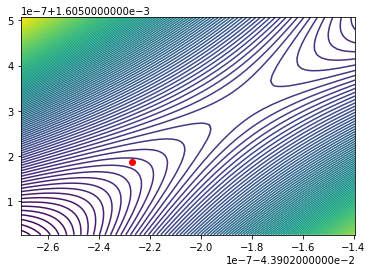

In [232]:
i = 2
thetai = thetaset[i]
kx0,ky0 = rot2D(saddleset[i][0],2*np.pi/3)
X = np.linspace(0.999998*kx0,1.000001*kx0,400)
Y = np.linspace(0.9999*ky0,1.0002*ky0,400)
X,Y,Z = data_for_contours(thetai,X=X,Y=Y)
plt.contour(X,Y,Z, levels=120)
plt.scatter(kx0,ky0,c='r')
#plt.savefig('magic_saddle.jpg')

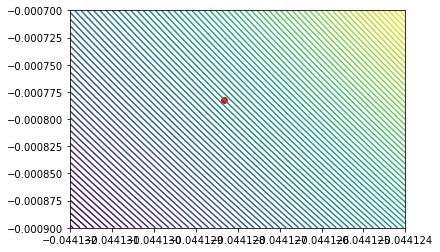

In [213]:
thetai = 1.05
kx0,ky0 = rot2D(saddleset[6][0],2*np.pi/3)
X = np.linspace(-0.044132,-0.0441240,400)
Y = np.linspace(-0.0009,-0.0007,400)
X,Y,Z = data_for_contours(thetai,X=X,Y=Y)
plt.contour(X,Y,Z, levels=100)
plt.scatter(kx0,ky0,c='r')
#plt.savefig('magic_saddle.jpg')

In [11]:
xG = [-0.045,0.01]
sol = find_saddle(xG, Theta = thetai*IN_RADIAN, verbose=False)
solx,soly = sol

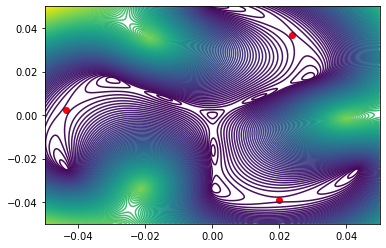

In [13]:
X = np.linspace(-0.05,0.05,400)
Y = np.linspace(-0.05,0.05,400)
X,Y,Z = data_for_contours(thetai,X=X,Y=Y)
rot120 = rot2D(sol,2*np.pi/3)
rot240 = rot2D(sol,4*np.pi/3)
plt.contour(X,Y,Z, levels=120)
plt.scatter(solx,soly,c = 'r')
plt.scatter(rot120[0],rot120[1],c='r')
plt.scatter(rot240[0],rot240[1],c='r')

### There is a real 3 fold rotation symmetry of the saddles,\n as evidenced by the newfound saddle being the same as a rotation of another symmetric saddle

In [20]:
xG120 = [0.02,-0.04]
sol120 = find_saddle(xG120, Theta = thetai*IN_RADIAN, verbose=False)
rot120 - sol120 

There is a real 3 fold rotation symmetry of the saddles,
 as evidenced by the newfound saddle being the same as a rotation of another symmetric saddle


(-0.04419865556110064, 0.0006355069997811477) -2.8581595505968838


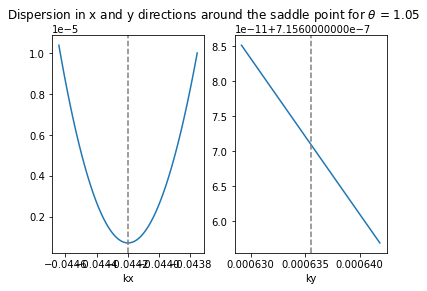

In [73]:
angle = np.arctan(soly/solx)
kx0,ky0 = rot2D(saddleset[5][0],2*np.pi/3)
#kx0 = solx
#ky0 = soly
thetai = 1.05
#kx0,ky0 = rot120
print((kx0,ky0), angle * 180/np.pi)
kx_vec = np.linspace(0.99*kx0, 1.01*kx0, 100)
ky_vec = np.linspace(0.99*ky0, 1.01*ky0, 100)

Esalongx = [generate_spectrum_Twisted_graphene_single_point(vF = vFpar, w = wpar, Theta = thetai*IN_RADIAN, 
                                                            kx_fixed = kxi, ky_fixed = ky0)[4] for kxi in kx_vec]
Esalongy = [generate_spectrum_Twisted_graphene_single_point(vF = vFpar, w = wpar, Theta = thetai*IN_RADIAN, 
                                                            kx_fixed = kx0, ky_fixed = kyi)[4] for kyi in ky_vec]

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Dispersion in x and y directions around the saddle point for $\\theta$ = ' + str(thetai))
ax1.plot(kx_vec, Esalongx)
ax1.axvline(x = kx0, color = 'grey', ls = '--')
ax1.set(xlabel = 'kx')
ax2.plot(ky_vec, Esalongy)
ax2.axvline(x = ky0, color = 'grey', ls = '--')
ax2.set(xlabel = 'ky')
plt.savefig('XYdispersion.jpg')

In [49]:
saddleset = []
thetaset = np.arange(0.8,1.25,0.05)
xG = rot2D([-0.045,0.01], 4*np.pi/3)
iternmax = 10000

for thetai in thetaset:
    itern = 0
    sol = find_saddle(xG, Theta = thetai*IN_RADIAN, verbose=True)
    while(itern < iternmax and sol[2]>=3):
        itern += 1
        sol = find_saddle(xG, Theta = thetai*IN_RADIAN, verbose=True)
        xG = sol[0]
    saddleset += [sol]
    
    

In [50]:
saddleset

[(array([0.02371269, 0.03671382]), 114, 2),
 (array([0.02356237, 0.03693095]), 135, 2),
 (array([0.02334125, 0.03721785]), 84, 4),
 (array([0.02303312, 0.03755725]), 75, 1),
 (array([0.02262665, 0.03791886]), 69, 2),
 (array([0.02264969, 0.03795941]), 30, 1),
 (array([0.02138686, 0.03860731]), 168, 1),
 (array([0.02053133, 0.03882683]), 90, 1),
 (array([0.01954416, 0.03888481]), 78, 4)]

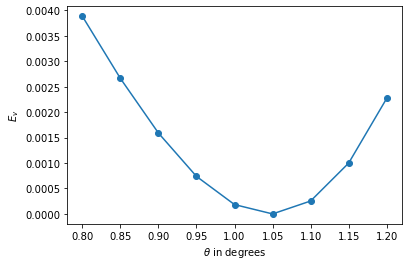

In [11]:
Evs = []

for i,saddle in enumerate(saddleset):
    #kx0,ky0 = saddle[0]
    kx0,ky0 = saddle
    thetai = thetaset[i]
    Ev = generate_spectrum_Twisted_graphene_single_point(vF = vFpar, w = wpar, Theta = thetai*IN_RADIAN, 
                                                            kx_fixed = kx0, ky_fixed = ky0)[4]
    Evs += [Ev]
plt.plot(thetaset,Evs,'o-')
plt.xlabel('$\\theta$ in degrees')
plt.ylabel('$E_v$')
plt.savefig("Angle dependence of pseudogap")

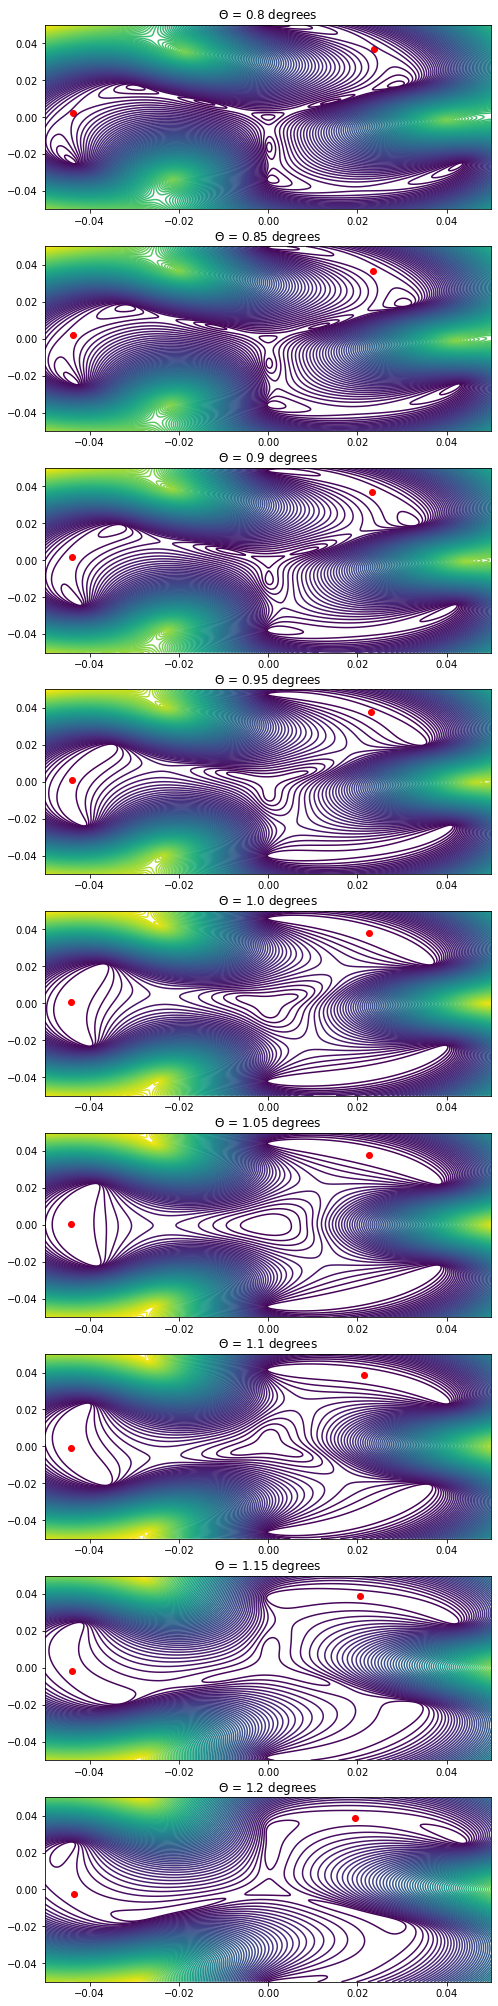

In [60]:
X = np.linspace(-0.05, 0.05,400)
Y = np.linspace(-0.05, 0.05,400)
n = len(thetaset)
fig = plt.figure(figsize = (8,4*n))

for i,saddle in enumerate(saddleset):
    kx0,ky0 = saddle[0]
    rotx120,roty120 = rot2D(saddle[0],2*np.pi/3)
    thetai = thetaset[i]
    X,Y,Z = data_for_contours(thetai,X=X,Y=Y)
    ax = fig.add_subplot(n,1,i+1)
    ax.contour(X,Y,Z, levels = 120)
    ax.scatter(kx0,ky0,c = 'r')
    ax.scatter(rotx120,roty120, c = 'r')
    ax.set_title('$\\Theta$ = ' + str(int(thetai*1000)/1000) + ' degrees')

plt.savefig('SaddleLocator.jpg')

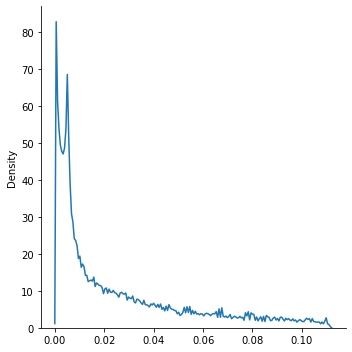

In [115]:
X,Y,Z = data_for_contours(1.05)
ser = pd.Series(Z.flatten())
#print(ser.head())
#ser.plot.kde()
#sns.kdeplot(ser)
sns.displot(ser, kind="kde", bw_adjust=.0125)

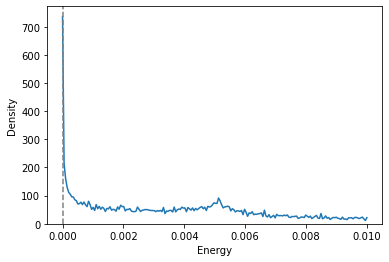

In [144]:
# g = sns.displot(ser, kind="kde", bw_adjust=.001, clip = (0,0.005))
# g.ax.axvline(x = Evs[5], color = 'grey', ls = '--')
# g.ax.set_title('$\\theta$ = 1.05 degrees')
ax = plt.subplot()
sns.kdeplot(ser, ax = ax, bw_adjust=.001, clip = (0,0.01))
ax.set_xlabel('Energy')
ax.axvline(x = Evs[5], color = 'grey', ls = '--')

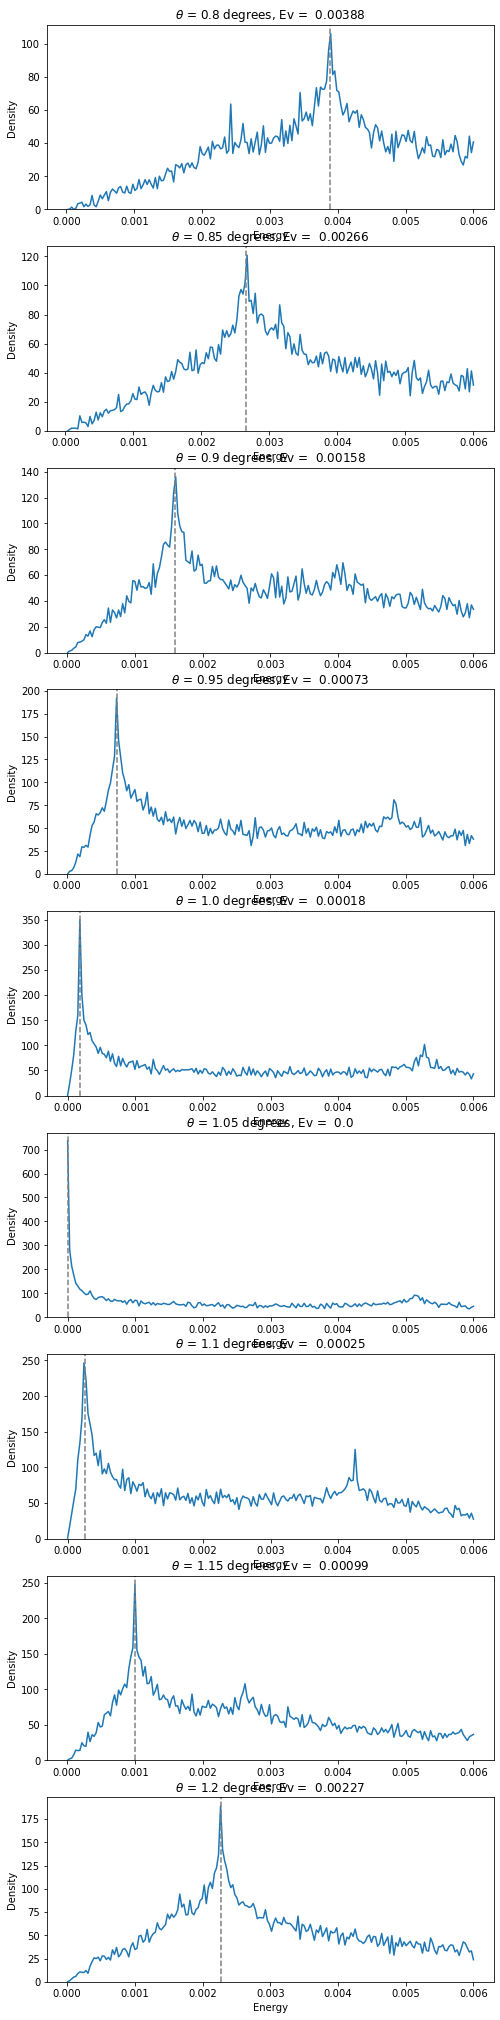

In [146]:
X = np.linspace(-0.05, 0.05,400)
Y = np.linspace(-0.05, 0.05,400)
n = len(thetaset)
fig = plt.figure(figsize = (8,4*n))

for i,saddle in enumerate(saddleset):
    kx0,ky0 = saddle[0]
    rotx120,roty120 = rot2D(saddle[0],2*np.pi/3)
    thetai = thetaset[i]
    Ev = Evs[i]
    X,Y,Z = data_for_contours(thetai,X=X,Y=Y)
    ser = pd.Series(Z.flatten())
    ax = fig.add_subplot(n,1,i+1)
    sns.kdeplot(ser, ax = ax, bw_adjust=.001, clip = (0,0.006))
    ax.set_xlabel('Energy')
    ax.axvline(x = Ev, color = 'grey', ls = '--')
    title_str = '$\\theta$ = ' + str(int(thetai*1000)/1000) + ' degrees, Ev =  ' + str(int(Ev*100000)/100000)  
    ax.set_title(title_str)

#plt.savefig('KDEplotsatSaddles.jpg')

In [163]:
# with open('Pseudogaps.csv', 'w', newline='') as f:
#     writer = csv.writer(f)
#     writer.writerows(zip(thetaset,Evs))

In [167]:
#np.save('saddleset',saddleset)
#np.save('thetaset',thetaset)

C:\Users\Aravi\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


In [189]:
testsaddleset = np.load('saddleset.npy')
testsaddleset

array([0.02371269, 0.03671382])

In [187]:
unverbose_saddleset = [saddle[0] for saddle in saddleset]
#np.save('saddleset', unverbose_saddleset)

In [264]:
pdvatfixedky = partial(FHpdvs,  vFpar,  wpar, thetai, ky_fixed = 0.01,symmetric = True)
pdvatfixedkx = partial(FHpdvs,  vFpar,  wpar, thetai, 0.12,symmetric = True)
def my_decorator(f,*args,**kwargs):
    def wrapper(*args,**kwargs):
        res = f(*args,**kwargs)
        return np.array(res)
    return wrapper

def ret_first_decorator(f,*args,**kwargs):
    def wrapper(*args,**kwargs):
        res = f(*args,**kwargs)
        return res[0]
    return wrapper

def ret_second_decorator(f,*args,**kwargs):
    def wrapper(*args,**kwargs):
        res = f(*args,**kwargs)
        return res[1]
    return wrapper

In [7]:
#i = 5
dets = []
for i in range(len(thetaset)):
    thetai = thetaset[i] * IN_RADIAN
    #print(thetaset[i])
    #kx0,ky0 = saddleset[i][0]
    #kx0,ky0 = rot2D(saddleset[i][0],2*np.pi/3)
    kx0,ky0 = rot2D(saddleset[i],2*np.pi/3)
    pdvatfixedky = partial(my_decorator(FHpdvs),  vFpar,  wpar, thetai, ky_fixed = ky0,symmetric = True)
    pdvatfixedkx = partial(my_decorator(FHpdvs),  vFpar,  wpar, thetai, kx0,symmetric = True)

    #print(derivative(pdvatfixedkx,ky0))
    b = scider(ret_first_decorator(pdvatfixedkx),ky0,dx=1e-8,n=1)
    d = scider(ret_second_decorator(pdvatfixedkx),ky0,dx=1e-8,n=1)
    a = scider(ret_first_decorator(pdvatfixedky),kx0,dx=1e-8,n=1)
    c = scider(ret_second_decorator(pdvatfixedky),kx0,dx=1e-8,n=1)
    HessMat = np.array([[a,b],[c,d]])
    #print(np.real(eig(HessMat)[0]))
    #print(np.linalg.det(HessMat))
    dets += [np.linalg.det(HessMat)]

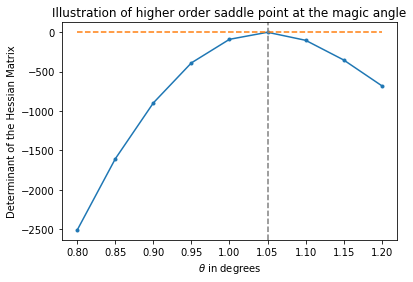

In [347]:
plt.plot(thetaset,dets,'.-')
plt.plot(thetaset, 0*thetaset, '--')
plt.xlabel('$\\theta $ in degrees')
plt.ylabel('Determinant of the Hessian Matrix')
plt.axvline(x=1.05,color = 'gray', linestyle = '--')
plt.title('Illustration of higher order saddle point at the magic angle')
#plt.savefig('HigherOrderSaddle.jpg')

In [6]:
#dets = []
rotangs = []
alphabeta = []
for i in range(len(thetaset)):
#i = 2
    thetai = thetaset[i] * IN_RADIAN
    #print(thetaset[i])
    # kx0,ky0 = saddleset[i][0]
    # kx0,ky0 = rot2D(saddleset[i][0],2*np.pi/3)
    kx0,ky0 = rot2D(saddleset[i],2*np.pi/3)
    pdvatfixedky = partial(my_decorator(FHpdvs),  vFpar,  wpar, thetai, ky_fixed = ky0,symmetric = True)
    pdvatfixedkx = partial(my_decorator(FHpdvs),  vFpar,  wpar, thetai, kx0,symmetric = True)

    #print(derivative(pdvatfixedkx,ky0))
    b = scider(ret_first_decorator(pdvatfixedkx),ky0,dx=1e-8,n=1)
    d = scider(ret_second_decorator(pdvatfixedkx),ky0,dx=1e-8,n=1)
    a = scider(ret_first_decorator(pdvatfixedky),kx0,dx=1e-8,n=1)
    c = scider(ret_second_decorator(pdvatfixedky),kx0,dx=1e-8,n=1)
    HessMat = np.array([[a,b],[c,d]])
    #print(np.real(eig(HessMat)[0]))
    EigVals, EigVectors = eig(HessMat)
    EigVals = np.real(EigVals)
    #print(EigVectors)
    rotang = [np.arctan(ev[1]/ev[0]) for ev in EigVectors]
    rotang = np.array(rotang)*180/np.pi
    rotangs += [rotang]
    alphabeta += [EigVals]
#print(np.linalg.det(HessMat))
#dets += [np.linalg.det(HessMat)]
rotangs, alphabeta

([array([ 26.53791681, -63.46208322]),
  array([ 23.79266224, -66.20733776]),
  array([ 19.94453956, -70.05546046]),
  array([ 14.74580555, -75.25419447]),
  array([  7.96183353, -82.0381664 ]),
  array([  0.35188698, -89.64811295]),
  array([-10.17428781,  79.82571219]),
  array([-20.11851882,  69.88148113]),
  array([-29.41430812,  60.5856919 ])],
 [array([175.95665924, -14.25991703]),
  array([156.46712589, -10.26319265]),
  array([138.33130911,  -6.48074723]),
  array([121.93312097,  -3.18641765]),
  array([107.88646553,  -0.83237778]),
  array([ 9.71561756e+01, -3.29489450e-03]),
  array([89.87253814, -1.13657313]),
  array([86.48326534, -4.06450489]),
  array([86.1631575 , -7.86968263])])

In [229]:
np.save('rotangs', rotangs)
np.save('alphabeta', alphabeta)
np.save('Evs',Evs)

### Let's rotate our coordinate system to the angle given by rotangs, and see if the dispersion is accurate with the parameters $\alpha$ and $\beta$

### Transformation : for each pair $(p_x , p_y)$, we get a $(k_x,k_y) = rot2D((p_x + kx0, p_y + ky0),\text{rotang})$

In [193]:
def transformer(px,py,kx0,ky0,rotang, first = 'rotation'):
    '''rotang should be in radians'''
    if first == 'shift':
        kx = px + kx0
        ky = py + ky0
        return rot2D([kx,ky],rotang)
    elif first == 'rotation':
        vec = rot2D([px,py],rotang)
        return vec+np.array([kx0,ky0])
    else: 
        raise(Exception('Invalid Choice of first'))

thetai =  1.0500000000000003  rotang =  0.35188698260379936  alpha, beta  =  [ 9.71561756e+01 -3.29489450e-03]


Text(0.5, 1.0, 'Y')

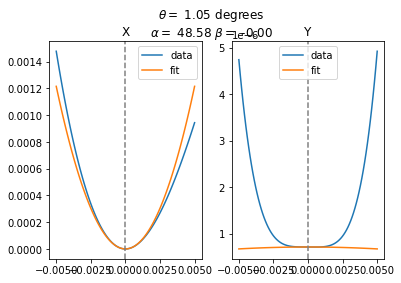

In [194]:
Esalongx = []
Esalongy = []
i = 5
thetai = thetaset[i] * IN_RADIAN
rotang = rotangs[i][0] * IN_RADIAN
alpha,beta = 0.5*alphabeta[i]
print('thetai = ',thetaset[i], ' rotang = ', rotangs[i][0], ' alpha, beta  = ',alphabeta[i] )
#kx0,ky0 = rot2D(saddleset[i][0],2*np.pi/3)
kx0,ky0 = rot2D(saddleset[i],2*np.pi/3)
#kx0,ky0 = saddleset[i][0]
Ev = Evs[i]
pxset = np.linspace(-0.005,0.005,100)
pyset = np.linspace(-0.005,0.005,100)

rotatedxaxisvals = [transformer(pxval,0,kx0,ky0,-1*rotang, first = 'rotation') for pxval in pxset]
rotatedyaxisvals = [transformer(0,pyval,kx0,ky0,-1*rotang, first = 'rotation') for pyval in pyset]
Esalongx = np.array([generate_spectrum_Twisted_graphene_single_point(vF=vFpar, w=wpar, Theta=thetai, kx_fixed=kxy[0], ky_fixed=kxy[1], symmetric=True)[4]
                for kxy in rotatedxaxisvals])
Esalongy = np.array([generate_spectrum_Twisted_graphene_single_point(vF=vFpar, w=wpar, Theta=thetai, kx_fixed=kxy[0], ky_fixed=kxy[1], symmetric=True)[4]
                for kxy in rotatedyaxisvals]) 
fig, (ax1,ax2) = plt.subplots(1,2)
titlestring = '$\\theta = $ ' + '{:.2f}'.format(thetaset[i]) + ' degrees \n'
titlestring += '$\\alpha =$ ' + '{:.2f}'.format(alpha) + ' $ \\beta  = $ ' +  '{:.2f}'.format(beta)
st = fig.suptitle(titlestring)
st.set_y(1.001)
ax1.plot(pxset, Esalongx,label = 'data')
ax1.plot(pxset, Ev + alpha * pxset**2,label='fit')
ax1.axvline(0,color = 'gray',ls = '--')
ax1.legend()
ax1.set_title('X')
ax2.plot(pyset, Esalongy,label = 'data')
ax2.plot(pyset, Ev + beta * pyset**2,label='fit')
ax2.axvline(0,color = 'gray', ls = '--')
ax2.legend()
ax2.set_title('Y')
#plt.savefig('Proof_of_quadratic_fit.jpg')

In [2]:
# thetaset = np.load('thetaset.npy')
# saddleset = np.load('saddleset.npy')

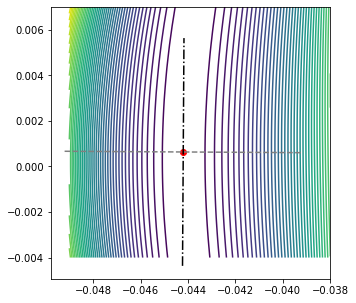

In [195]:
X = np.linspace(-0.049,-0.038,100)
Y = np.linspace(-0.004,0.007,100)
X,Y,Z = data_for_contours(thetaset[i],X=X,Y=Y)
fig = plt.figure(figsize = (5,5))
plt.contour(X,Y,Z,levels = 50)
xdatax,ydatax = np.array(rotatedxaxisvals).T
plt.plot(xdatax,ydatax, color = 'gray', linestyle = '--')
xdatay,ydatay = np.array(rotatedyaxisvals).T
plt.plot(xdatay,ydatay, color = 'black', linestyle = '-.')
plt.scatter(kx0,ky0,c='r')
plt.axes().set_aspect('equal')

### Checking the consistency of alpha,beta with jacobian contraction of the Hessian - beauty!!

In [ ]:
kx0,ky0 = rot2D(saddleset[i],2*np.pi/3)
pdvatfixedky = partial(my_decorator(FHpdvs),  vFpar,  wpar, thetai, ky_fixed = ky0,symmetric = True)
pdvatfixedkx = partial(my_decorator(FHpdvs),  vFpar,  wpar, thetai, kx0,symmetric = True)

b = scider(ret_first_decorator(pdvatfixedkx),ky0,dx=1e-8,n=1) #yx
d = scider(ret_second_decorator(pdvatfixedkx),ky0,dx=1e-8,n=1) #yy
a = scider(ret_first_decorator(pdvatfixedky),kx0,dx=1e-8,n=1) #xx
c = scider(ret_second_decorator(pdvatfixedky),kx0,dx=1e-8,n=1) #xy
HessMat = np.array([[a,b],[b,d]])

print(HessMat)

[[ 9.71525109e+01 -5.96698282e-01]
 [-5.96698282e-01  3.69826392e-04]]


In [197]:
theta = -1*rotang
covJac = np.array([[np.cos(theta),1*np.sin(theta)],[-1*np.sin(theta),np.cos(theta)]])
res3 = np.einsum('ij,kl,jl->ik',covJac,covJac,0.5*HessMat)
print(res3,alpha,beta)

[[ 4.85780878e+01 -3.28055860e-18]
 [ 2.05786655e-17 -1.64744688e-03]] 48.578087800140665 -0.0016474472495307778


### Constructing the Rank 3 derivatives

In [225]:
#precs = [1e-2,1e-4,1e-6,1e-7,1e-8]
precs = [1e-7,]
for prec in precs:
    val0 = scider(ret_first_decorator(pdvatfixedky),kx0,dx=prec,n=2) #xxx
    val1 = scider(ret_second_decorator(pdvatfixedky),kx0,dx=prec,n=2) #xxy
    val2 = scider(ret_first_decorator(pdvatfixedkx),ky0,dx=prec,n=2) #yyx
    val3 = scider(ret_second_decorator(pdvatfixedkx),ky0,dx=prec,n=2) #yyy
    vallist = np.array([val0,val1,val2,val3])
    print(vallist) #You can see that this converges
    

[-13168.7660776     428.50167858  -2205.92710765     40.61195824]


In [199]:
dim = 2
T3 = np.zeros(8).reshape(2,2,2)
for i in range(dim):
    for j in range(dim):
        for k in range(dim): 
            T3[i,j,k] = vallist[i+j+k]
T3

array([[[-13168.7660776 ,    428.50167858],
        [   428.50167858,  -2205.92710765]],

       [[   428.50167858,  -2205.92710765],
        [ -2205.92710765,     40.61195824]]])

In [200]:
ResRank3 = (1.0/6)*np.einsum('ij,kl,no,jlo->ikn',covJac,covJac,covJac,T3)
coeffs3 = np.array([1.0*ResRank3[0,0,0],3.0*ResRank3[0,0,1],3.0*ResRank3[0,1,1],1.0*ResRank3[1,1,1]])
print(coeffs3)

[-2.19602756e+03  1.87333583e+02 -1.10055949e+03  2.20149881e-03]


### Constructing Rank 4 derivatives

In [201]:
#precs = [1e-2,1e-4,1e-6,1e-7,1e-8]
precs = (1e-6,)
for prec in precs:
    def MODDEDpdvatfixedky(y) :
        return scider(ret_first_decorator(partial(my_decorator(FHpdvs),  vFpar,  wpar, thetai, ky_fixed = y,symmetric = True)), kx0,dx = prec, n=1)
        
    val40 = scider(ret_first_decorator(pdvatfixedky),kx0,dx=prec,n=3,order=5) #xxxx
    val41 = scider(ret_second_decorator(pdvatfixedky),kx0,dx=prec,n=3,order=5) #xxxy
    #val42 = scider(scider(ret_first_decorator(pdvatfixedky),kx0,dx=prec,n=1)    ,ky0,dx = prec,n=2)
    val42 = scider(MODDEDpdvatfixedky,ky0,dx=prec,n=2) #yyxx
    val43 = scider(ret_first_decorator(pdvatfixedkx),ky0,dx=prec,n=3,order=5) #yyx
    val44 = scider(ret_second_decorator(pdvatfixedkx),ky0,dx=prec,n=3,order=5) #yyy 
    vallist = np.array([val40,val41,val42,val43,val44])
    print(vallist) #You can see that this converges (~ish)

[-147559.04831354    6994.40505514  647554.92701352  -40294.15689999
  150324.19753425]


In [202]:
dim = 2
T4 = np.zeros(16).reshape(2,2,2,2)
for i in range(dim):
    for j in range(dim):
        for k in range(dim): 
            for l in range(dim):
                T4[i,j,k,l] = vallist[i+j+k+l]
                
ResRank4 = (1.0/24)*np.einsum('ij,kl,no,pq,jloq->iknp',covJac,covJac,covJac,covJac,T4)
coeffs4 = np.array([1.0*ResRank4[0,0,0,0], 4.0*ResRank4[0,0,0,1], 6.0*ResRank4[0,0,1,1], 4.0*ResRank4[0,1,1,1], 1.0*ResRank4[1,1,1,1]])
print(coeffs4)

[ -6148.88133328   -974.590239   161997.32069103  -4879.85467836
   6227.89957159]


In [207]:
def returnpoly(px,py,coeffs):
    n = len(coeffs)-1
    polyval = 0
    for i,coeffval in enumerate(coeffs):
        polyval += (px**(n-i)) * (py**i) * coeffval
    return polyval

In [209]:
thirdpolyx = [returnpoly(pxval,0,coeffs3) for pxval in pxset]
thirdpolyy = [returnpoly(0,pyval,coeffs3) for pyval in pyset]
fourthpolyx = [returnpoly(pxval,0,coeffs4) for pxval in pxset]
fourthpolyy = [returnpoly(0,pyval,coeffs4) for pyval in pyset]

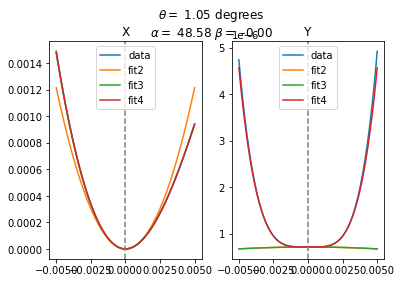

In [224]:
#Ev = Evs[5]
ival = 5
pxset = np.linspace(-0.005,0.005,100)
pyset = np.linspace(-0.005,0.005,100)

rotatedxaxisvals = [transformer(pxval,0,kx0,ky0,-1*rotang, first = 'rotation') for pxval in pxset]
rotatedyaxisvals = [transformer(0,pyval,kx0,ky0,-1*rotang, first = 'rotation') for pyval in pyset]
Esalongx = np.array([generate_spectrum_Twisted_graphene_single_point(vF=vFpar, w=wpar, Theta=thetai, kx_fixed=kxy[0], ky_fixed=kxy[1], symmetric=True)[4]
                for kxy in rotatedxaxisvals])
Esalongy = np.array([generate_spectrum_Twisted_graphene_single_point(vF=vFpar, w=wpar, Theta=thetai, kx_fixed=kxy[0], ky_fixed=kxy[1], symmetric=True)[4]
                for kxy in rotatedyaxisvals]) 
fig, (ax1,ax2) = plt.subplots(1,2)
titlestring = '$\\theta = $ ' + '{:.2f}'.format(thetai*180/np.pi) + ' degrees \n'
titlestring += '$\\alpha =$ ' + '{:.2f}'.format(alpha) + ' $ \\beta  = $ ' +  '{:.2f}'.format(beta)
st = fig.suptitle(titlestring)
st.set_y(1.001)
ax1.plot(pxset, Esalongx,label = 'data')
ax1.plot(pxset, Ev + alpha * pxset**2,label='fit2')
ax1.plot(pxset, Ev + alpha * pxset**2 + thirdpolyx ,label='fit3')
ax1.plot(pxset, Ev + alpha * pxset**2 + thirdpolyx + fourthpolyx ,label='fit4')
ax1.axvline(0,color = 'gray',ls = '--')
ax1.legend()
ax1.set_title('X')
ax2.plot(pyset, Esalongy,label = 'data')
ax2.plot(pyset, Ev + beta * pyset**2,label='fit2')
ax2.plot(pyset, Ev + beta * pyset**2 + thirdpolyy, label='fit3')
ax2.plot(pyset, Ev + beta * pyset**2 + thirdpolyy + fourthpolyy, label='fit4')
#ax2.plot(pyset, Ev + beta * pyset**2 + coeffs4[4]*pyset**4, label='testfit')
ax2.axvline(0,color = 'gray', ls = '--')
ax2.legend()
ax2.set_title('Y')
#plt.savefig('Higher order fits')

1